In [177]:
import pandas as pd

In [178]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [179]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [180]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [181]:
# isolating rows in fake that have dates in different formats than the rest

not_2015 = ~fake.date.str.endswith('2015')
not_2016 = ~fake.date.str.endswith('2016')
not_2017 = ~fake.date.str.endswith('2017')

fake[not_2015 & not_2016 & not_2017]

,title,text,subject,date
9050,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,19-Feb-18
9051,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18
9052,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,19-Feb-18
9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,18-Feb-18
9054,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,18-Feb-18
9055,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,politics,18-Feb-18
9056,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,18-Feb-18
9057,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politics,18-Feb-18
9058,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,18-Feb-18
9059,BUSTED! Maxine Waters’ Ties to Black Nationali...,We reported that Maxine Waters and members of ...,politics,18-Feb-18


In [182]:
# dropping those rows
fake.drop(fake[not_2015 & not_2016 & not_2017].index, inplace=True)

In [183]:
subj_dict = {
    'Government News': 1,
    'Middle-east': 0,
    'News': 1,
    'US_News': 1,
    'left-news': 1,
    'politics': 1,
    'politicsNews': 1,
    'worldnews': 0
}

In [184]:
# adding a target columns so i can concatenate the dataframes
fake['is_true'] = 0
true['is_true'] = 1

df = pd.concat([fake,true])
df.date = pd.to_datetime(df.date, infer_datetime_format = True) # converting to datetime format
df.sort_values('date',inplace=True) # sorting by date
df.reset_index(drop=True, inplace=True) # resetting index according to date
df['domestic'] = df.subject.map(subj_dict)
df.drop(columns='subject',inplace=True)
df.drop_duplicates(inplace=True) # dropping a couple hundred duplicates
df

,title,text,date,is_true,domestic
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1
...,...,...,...,...,...
44846,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,0
44848,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,2017-12-31,1,1
44849,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,2017-12-31,1,1
44850,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,1


In [185]:
df.shape

(39858, 5)

In [186]:
# baseline
df.is_true.value_counts(normalize=True)[0]

0.4678358171508856

In [187]:
df

,title,text,date,is_true,domestic
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1
...,...,...,...,...,...
44846,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,0
44848,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,2017-12-31,1,1
44849,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,2017-12-31,1,1
44850,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,1


In [188]:
import re

special_char_regex = re.compile(r'''(
    
    
    )''', re.VERBOSE)



In [189]:
df.loc[0, 'text']

'The irony here isn t lost on us. Hillary is being compared to the President she wanted to take down. Nixon s got nothing on this criminal who wiped her server clean after e-mails were requested from her. John Fund questions the Democrat s strategy  to support a Nixonian type candidate with more baggage than a Samsonite factory She s secretive, scandal-plagued, and seemingly inevitable. Ever since Hillary Clinton s e-mail scandal broke, comparisons between her secretive style and that of Richard Nixon, whom she ironically pursued as a young lawyer on the House impeachment committee, have been frequent. But with the revelation that she wiped her private e-mail server clean after her records were requested by the State Department last year, the comparisons are becoming more concrete. Washington wags note that even Nixon never destroyed the tapes, but Hillary has permanently erased her e-mails.Exactly what would a Hillary presidency look like, and could it plunge the nation into another r

### Brian Notes

In [190]:
# create a column that shows the number of words in the title and text columns
df['title_word_count'] = df.title.apply(lambda x: len(x.split(' ')))
df['text_word_count'] = df.text.apply(lambda x: len(x.split(' ')))

In [191]:
# importing module for regex 
import re 

# Title - upper
# String to be searched in start of string  
search =re.compile(r'''(
        ([A-Z])
        )''', re.VERBOSE)
  
# count of occurrence of [regex] and create new column 
df["title_uppercase_count"]= df["title"].str.count(search) 

# Title - lower 
search =re.compile(r'''(
        ([a-z])
        )''', re.VERBOSE)
df["title_lowercase_count"]= df["title"].str.count(search) 

# Title - all letters
search =re.compile(r'''(
        ([A-Za-z])
        )''', re.VERBOSE)
df["title_all_letter_count"]= df["title"].str.count(search)

# Title - special characters 
search =re.compile(r'''(
        ([!?#%$()])
        )''', re.VERBOSE)
df["title_special_count"]= df["title"].str.count(search) 

# Title - ! 
search =re.compile(r'''(
        ([!])
        )''', re.VERBOSE)
df["title_!"]= df["title"].str.count(search) 

# Title - ? 
search =re.compile(r'''(
        ([?])
        )''', re.VERBOSE)
df["title_?"]= df["title"].str.count(search) 

# Title - # 
search =re.compile(r'''(
        ([#])
        )''', re.VERBOSE)
df["title_#"]= df["title"].str.count(search) 

# Title - % 
search =re.compile(r'''(
        ([%])
        )''', re.VERBOSE)
df["title_%"]= df["title"].str.count(search) 

# Title - $ 
search =re.compile(r'''(
        ([$])
        )''', re.VERBOSE)
df["title_$"]= df["title"].str.count(search)

# Title - () 
search =re.compile(r'''(
        ([()])
        )''', re.VERBOSE)
df["title_parentheses"]= df["title"].str.count(search)

# ---------------------------------

# Text - upper
search =re.compile(r'''(
        ([A-Z])
        )''', re.VERBOSE)
df["text_uppercase_count"]= df["text"].str.count(search) 

# Text - lower
search =re.compile(r'''(
        ([a-z])
        )''', re.VERBOSE)
df["text_lowercase_count"]= df["text"].str.count(search) 

# Title - all letters
search =re.compile(r'''(
        ([A-Za-z])
        )''', re.VERBOSE)
df["text_all_letter_count"]= df["text"].str.count(search)

# Text - special characters
search =re.compile(r'''(
        ([!?#%$()])
        )''', re.VERBOSE)
df["text_special_count"]= df["text"].str.count(search) 

# Text - ! 
search =re.compile(r'''(
        ([!])
        )''', re.VERBOSE)
df["text_!"]= df["text"].str.count(search) 

# Text - ? 
search =re.compile(r'''(
        ([?])
        )''', re.VERBOSE)
df["text_?"]= df["text"].str.count(search) 

# Text - # 
search =re.compile(r'''(
        ([#])
        )''', re.VERBOSE)
df["text_#"]= df["text"].str.count(search) 

# Text - % 
search =re.compile(r'''(
        ([%])
        )''', re.VERBOSE)
df["text_%"]= df["text"].str.count(search) 

# Text - $ 
search =re.compile(r'''(
        ([$])
        )''', re.VERBOSE)
df["text_$"]= df["text"].str.count(search)

# Text - () 
search =re.compile(r'''(
        ([()])
        )''', re.VERBOSE)
df["text_parentheses"]= df["text"].str.count(search)

# display
df.head()



# https://www.geeksforgeeks.org/python-pandas-series-str-count/

,title,text,date,is_true,domestic,title_word_count,text_word_count,title_uppercase_count,title_lowercase_count,title_all_letter_count,title_special_count,title_!,title_?,title_#,title_%,title_$,title_parentheses,text_uppercase_count,text_lowercase_count,text_all_letter_count,text_special_count,text_!,text_?,text_#,text_%,text_$,text_parentheses
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1,12,332,64,0,64,0,0,0,0,0,0,0,56,1566,1622,1,0,1,0,0,0,0
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1,9,1268,48,0,48,0,0,0,0,0,0,0,412,5975,6387,106,0,0,0,0,2,104
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1,21,215,62,45,107,0,0,0,0,0,0,0,58,938,996,2,0,0,0,0,0,2
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1,15,131,59,0,59,1,0,1,0,0,0,0,32,465,497,3,0,1,0,0,0,2
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1,10,425,39,0,39,1,1,0,0,0,0,0,95,1906,2001,8,0,4,0,0,4,0


### Creating Training and Testing CSV

In [192]:
from sklearn.model_selection import train_test_split

In [200]:
X = df.drop(['is_true'], axis=1)
y = df[['is_true']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=True, random_state=42)

In [199]:
X.shape, y.shape

((39858, 26), (39858, 1))

### Misc. Ideas

In [77]:
# To find (R-NV)
search =re.compile(r'''(
        ([A-Z][-][A-Z])
        )''', re.VERBOSE)
df["rep"]= df["text"].str.count(search) 

In [66]:
df.loc[3, 'text']

'In case you missed it Sen. Harry Reid (R-NV), who announced last week that he will retire after his current term expires in early 2017, said he does not regret taking to the Senate floor in 2012 to accuse then-GOP presidential nominee Mitt Romney of not paying his taxes. No, I don t regret that at all,  he told CNN s Dana Bash.  The Koch brothers   no one would help me. They were afraid the Koch brothers would go after them, so I did it on my own. Bash said some viewed the charge as  McCarthy-ite,  but Reid didn t buy that explanation. He shrugged, saying,  they can call it whatever they want. Romney didn t win, did he?  Reid said somewhat amusingly.'

In [103]:
df.head()

,title,text,date,is_true,domestic,title_uppercase_count,title_lowercase_count,title_special_count,title_!,title_?,...,text_lowercase_count,text_special_count,text_!,text_?,text_#,text_%,text_$,text_parentheses,title_word_count,text_word_count
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1,64,0,0,0,0,...,1566,1,0,0,0,0,0,0,12,332
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1,48,0,0,0,0,...,5975,106,0,0,0,0,0,0,9,1268
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1,62,45,0,0,0,...,938,2,0,0,0,0,0,0,21,215
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1,59,0,1,0,1,...,465,3,0,1,0,0,0,0,15,131
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1,39,0,1,1,0,...,1906,8,1,0,0,0,0,0,10,425


### EDA

In [104]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [105]:
df.columns

Index(['title', 'text', 'date', 'is_true', 'domestic', 'title_uppercase_count',
       'title_lowercase_count', 'title_special_count', 'title_!', 'title_?',
       'title_#', 'title_%', 'title_$', 'title_parentheses',
       'text_uppercase_count', 'text_lowercase_count', 'text_special_count',
       'text_!', 'text_?', 'text_#', 'text_%', 'text_$', 'text_parentheses',
       'title_word_count', 'text_word_count'],
      dtype='object')

In [121]:
real_df = df[df.is_true == 1]
fake_news = df[df.is_true == 0]

In [118]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

features = ['title_uppercase_count',
       'title_lowercase_count', 'title_special_count', 'title_!', 'title_?',
       'title_#', 'title_%', 'title_$', 'title_parentheses',
       'text_uppercase_count', 'text_lowercase_count', 'text_special_count',
       'text_!', 'text_?', 'text_#', 'text_%', 'text_$', 'text_parentheses',
       'title_word_count', 'text_word_count']
X = clean_df[features]

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap((X.corr()), annot=True)
# plt.savefig('correlation')
plt.show()

In [ ]:
sns.heatmap(predictions.corr(),
           annot=True,
           cmap = 'coolwarm',
           vmin=-1,
           vmax=1);

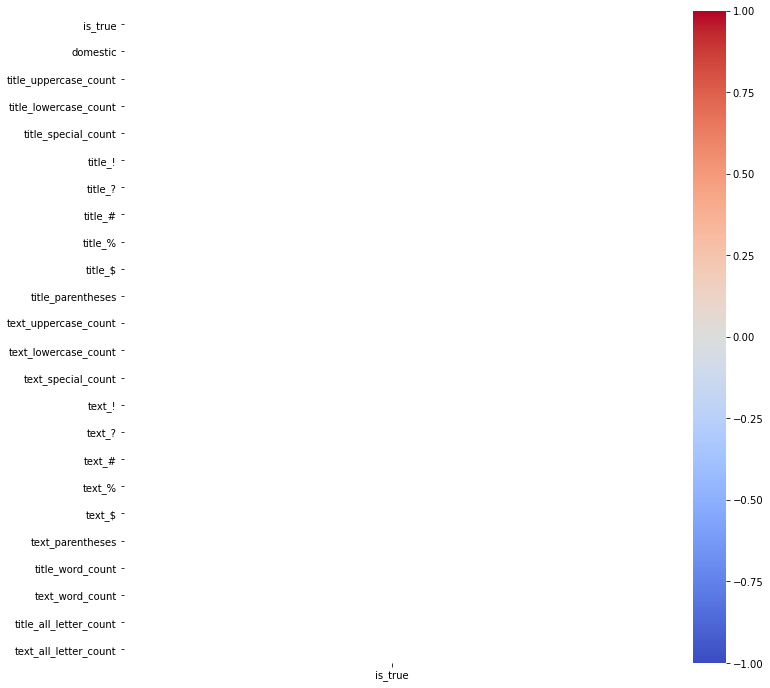

In [127]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(real_df.corr()[['is_true']].sort_values('is_true'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
# ax.invert_yaxis()

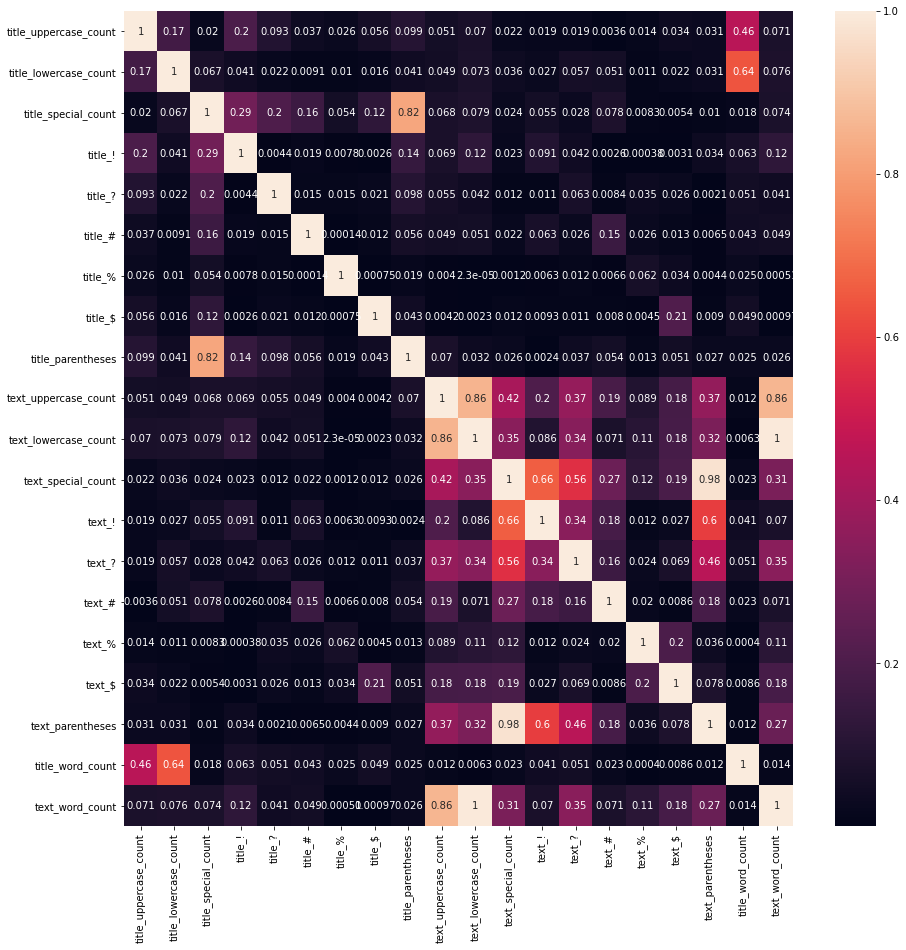

In [119]:
features = ['title_uppercase_count',
       'title_lowercase_count', 'title_special_count', 'title_!', 'title_?',
       'title_#', 'title_%', 'title_$', 'title_parentheses',
       'text_uppercase_count', 'text_lowercase_count', 'text_special_count',
       'text_!', 'text_?', 'text_#', 'text_%', 'text_$', 'text_parentheses',
       'title_word_count', 'text_word_count']
X = fake_news[features]

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(np.abs(X.corr()), annot=True)
# plt.savefig('correlation')
plt.show()